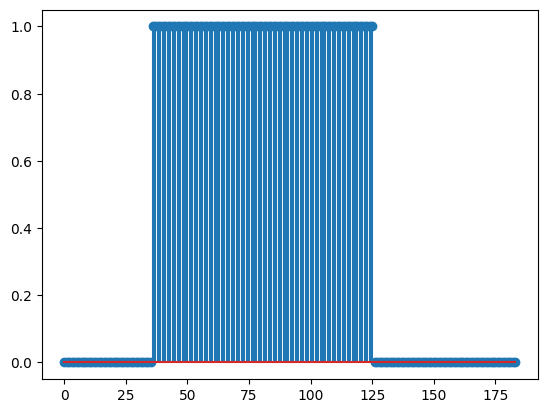

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write

FRAME_SIZE = 2048

def ece420ProcessFrame(frame):
    isVoiced = 0

    sum = 0
    #### YOUR CODE HERE ####
    for i in range(len(frame)):
        sum += frame[i]**2
    return sum > 3*1e9


################# GIVEN CODE BELOW #####################

Fs, data = read('test_vector.wav')

numFrames = int(len(data) / FRAME_SIZE)
framesVoiced = np.zeros(numFrames)

for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    framesVoiced[i] = ece420ProcessFrame(frame.astype(float))

plt.figure()
plt.stem(framesVoiced)
plt.show()

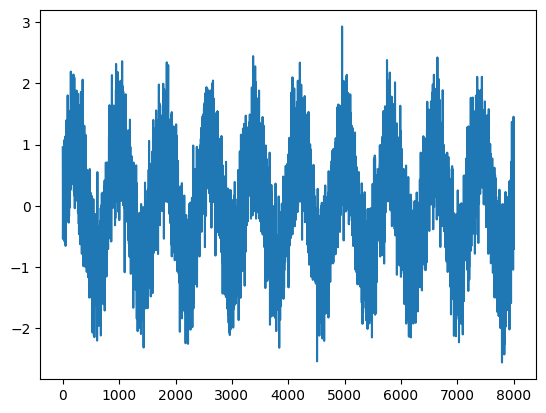

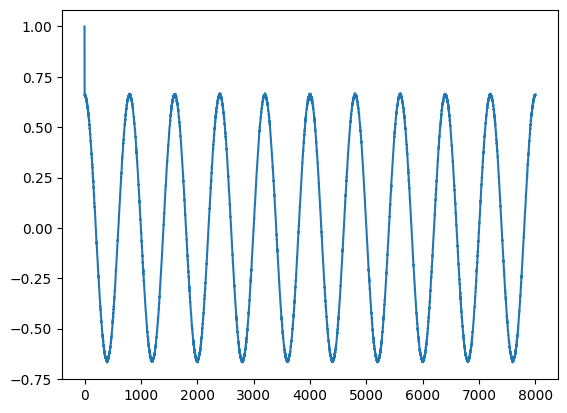

In [21]:

import numpy as np
import matplotlib.pyplot as plt



def autoCor(tune):
    totalsquared = 0
    toReturn = []

    for i in range(len(tune)):
        totalsquared += tune[i]**2
        
            
    for i in range(len(tune)):
        temp = 0
        for j in range(len(tune)):
            temp += tune[j] * tune[(j-i)]
        toReturn.append(temp/totalsquared)

    
    
    return toReturn

fs = 8000        # Sampling Rate is 8000
duration = 1     # 1 sec
t = np.linspace(0,duration,duration*fs)
freq = 10        # Tune Frequency is 10 Hz
tune = np.sin(2*np.pi*freq*t)

# Add some Gaussian noise 
tune += np.random.normal(0, 0.5, duration * fs)

plt.figure()
plt.plot(np.arange(len(tune)), tune)

# Start a new figure for your autocorrelation plot 
plt.figure() 


# Your code here

a = autoCor(tune)
plt.plot(np.arange(len(a)), a)
# Only call plt.show() at the very end of the script 
plt.show()

In [22]:
maxl = np.argmax(a[300:])+ 300
print(maxl)
print(maxl/8000)
print(8000/maxl)


3204
0.4005
2.4968789013732833


### ANSWER TO QUESTION  

The value of L that maximized the correlation is 0 since we have a perfect overlap. However this is uselessand the more interesting answer to the question can be seen when the value of L is equal to 811.  

When L = 811 we see another significant peak in the correlation which implies that we see a significant frequency in our signal that has analog period 811/Fs = .1013 seconds and frequency 9.86 hz